In [1]:
from ei_net import *
from ce_net import *
import matplotlib.pyplot as plt

import datetime as dt

%matplotlib inline

In [2]:
##########################################
############ PLOTTING SETUP ##############
EI_cmap = "Greys"
where_to_save_pngs = "../figs/pngs/"
where_to_save_pdfs = "../figs/pdfs/"
save = True
plt.rc('axes', axisbelow=True)
##########################################
##########################################

# The emergence of informative higher scales in complex networks

# Chapter 06 - Causal Emergence and the Emergence of Scale

## Network Macroscales
First we must introduce how to recast a network, $G$, at a higher scale. This is represented by a new network, $G_M$. Within $G_M$, a micro-node is a node that was present in the original $G$, whereas a macro-node is defined as a node, $v_M$, that represents a subgraph, $S_i$, from the original $G$ (replacing the subgraph within the network). Since the original network has been dimensionally reduced by grouping nodes together, $G_M$ will always have fewer nodes than $G$.

A macro-node $\mu$ is defined by some $W^{out}_{\mu}$, derived from the edge weights of the various nodes within the subgraph it represents. One can think of a macro-node as being a summary statistic of the underlying subgraph's behavior, a statistic that takes the form of a single node. Ultimately there are many ways of representing a subgraph, that is, building a macro-node, and some ways are more accurate than others in capturing the subgraph's behavior, depending on the connectivity. To decide whether or not a macro-node is an accurate summary of its underlying subgraph, we check whether random walkers behave identically on $G$ and $G_M$. We do this because many important analyses and algorithms---such as using PageRank for determining a node's centrality or InfoMap for community discovery---are based on random walking.

Specifically, we define the *inaccuracy* of a macroscale as the Kullback-Leibler divergence between the expected distribution of random walkers on $G$ vs. $G_M$, given some identical initial distribution on each. The  expected distribution over $G$ at some future time $t$ is $P_m(t)$, while the distribution over $G_M$ at some future time $t$ is $P_M(t)$. To compare the two, the distribution $P_m(t)$ is summed over the same nodes in the macroscale $G_M$, resulting in the distribution $P_{M|m}(t)$ (the microscale given the macroscale). We can then define the macroscale inaccuracy over some series of time steps $T$ as:

$$ \text{inaccuracy} = \sum_{t=0}^T \text{D}_{_{KL}}[P_{M}(t) || P_{M|m}(t)] $$

This measure addresses the extent to which a random dynamical process on the microscale topology will be recapitulated on a dimensionally-reduced topology.

What constitutes an accurate macroscale depends on the connectivity of the subgraph that gets grouped into a macro-node. The $W^{out}_{\mu}$ can be constructed based on the collective $W^{out}$ of the subgraph. For instance, in some cases one could just coarse-grain a subgraph by using its average $W^{out}$ as the $W^{out}_{\mu}$ of some new macro-node $\mu$. However, it may be that the subgraph has dependencies not captured by such a coarse-grain. Indeed, this is similar to the recent discovery that when constructing networks from data it is often necessary to explicitly model higher-order dependencies by using higher-order nodes so that the dynamics of random walks to stay true to the original data. We therefore introduce *higher-order macro-nodes* (HOMs), which draw on similar techniques to accurately represent subgraphs as single nodes.
____________


<img src="../figs/pngs/CoarseGraining.png" width=800>

- Top: The original network, $G$ along with its adjacency matrix (left). The shaded oval indicates that subgraph $S$ member nodes $v_B$ and $v_C$ will be grouped together, forming a macro-node, ${\mu}$. All macro-nodes are some transformation of the original adjacency matrix via recasting it as a new adjacency matrix (right). The manner of this recasting depends on the type of macro-node. 
- Bottom left: The simplest form of a macro-node is when $W^{out}_{\mu}$ is an average of the $W^{out}_{i}$ of each node in the subgraph. 
- Bottom center left: A macro-node that represents some path-dependency, such as input from $A$. Here, in averaging to create the $W^{out}_{\mu}$ the out-weights of nodes $v_B$ and $v_C$ are weighted by their input from  $v_A$. 
- Bottom center right: A macro-node that represents the subgraph's output over the network's stationary dynamics. Each node has some associated ${\pi}_{i}$, which is the probability of ${v}_{i}$ in the stationary distribution of the network. The $W^{out}_{\mu}$ of a $\mu | \pi$ macro-node is created by weighting each $W^{out}_{i}$ of the micro-nodes in the subgraph $S$ by $\frac{{\pi}_{i}}{\sum_{k \in S} {\pi}_{k}}$. 
- Bottom right: A macro-node with a single timestep delay between input $\mu | j$ and its output $\mu | \pi$, each constructed using the same techniques as its components. However, $\mu | j$ always deterministically outputs to $\mu | \pi$. 

Different subgraph connectivities require different types of HOMs to accurately represent. For instance, HOMs can be based on the input weights to the macro-node, which take the form $\mu | j$. In these cases the $W^{out}_{\mu|j}$ is a weighted average of each node's $W^{out}$ in the subgraph, where the weight is based on the input weight to each node in the subgraph. Another type of HOM that generally leads to accurate macro-nodes over time is when the $W^{out}_{\mu}$ is based on the stationary output from the subgraph to the rest of the network, which we represent as $\mu | \pi$. These types of HOMs may sometimes have minor inaccuracies given some initial state, but will almost always trend toward perfect accuracy as the network approaches its stationary dynamics. 

Subgraphs with complex internal dynamics can require a more complex type of HOM in order to preserve the network's accuracy. For instance, in cases where subgraphs have a delay between their inputs and outputs, this can be represented by a combination of $\mu | j$ and $\mu | \pi$, which when combined captures that delay. In these cases the macro-node $\mu$ has two components, one of which acts as a buffer over a timestep. This means that macro-nodes can possess memory even when constructed from networks that are at the microscale memoryless, and in fact this type of HOM is sometimes necessary to accurately capture the microscale dynamics.

We present these types of macro-nodes not as an exhaustive list of all possible HOMs, but rather as examples of how to construct higher scales in a network by representing subgraphs as nodes, and also sometimes using higher-order dependencies to ensure those nodes are accurate. This approach offers a complete generalization of previous work on coarse-grains and also black boxes, while simultaneously solving the previously unresolved issue of macroscale accuracy by using higher-order dependencies. The types of macro-nodes formed by subgraphs also provides substantive information about the network, such as whether the macroscale of a network possesses memory or path-dependency.

## Causal emergence reveals the scale of networks

Causal emergence occurs when a recast network, $G_M$ (a macroscale), has more $EI$ than the original network, $G$ (the microscale). In general, networks with lower effectiveness (low $EI$ given their size) have a higher potential for causal emergence, since they can be recast to reduce their uncertainty. Searching across groupings allows the identification or approximation of a macroscale that maximizes the $EI$. 

Checking all possible groupings is computationally intractable for all but the smallest networks. Therefore, in order to find macro-nodes which increase the $EI$, we use a greedy algorithm that groups nodes together and checks if the $EI$ increases. By choosing a node and then pairing it iteratively with its surrounding nodes we can grow macro-nodes until pairings no longer increase the $EI$, and then move on to a new node.

By generating undirected preferential attachment networks and varying the degree of preferential attachment, $\alpha$, we observe a crucial relationship between preferential attachment and causal emergence. One of the central results in network science has been the identification of "scale-free" networks. Our results show that networks that are not "scale-free" can be further separated into micro-, meso-, and macroscales depending on their connectivity. This scale can be identified based on their degree of causal emergence. In cases of sublinear preferential attachment ($\alpha < 1.0$) networks lack higher scales. Linear preferential attachment ($\alpha=1.0$) produces networks that are scale-free, which is the zone of preferential attachment right before the network develops higher scales. Such higher scales only exist in cases of superlinear preferential attachment ($\alpha > 1.0$). And past $\alpha > 3.0$ the network begins to converge to a macroscale where almost all the nodes are grouped into a single macro-node. The greatest degree of causal emergence is found in mesoscale networks, which is when $\alpha$ is between 1.5 and 3.0, when networks possess a rich array of macro-nodes.

Correspondingly the size of $G_M$ decreases as $\alpha$ increases and the network develops an informative higher scale, which can be seen in the ratio of macroscale network size, $N_M$, to the original network size, $N$. As discussed in previous sections, on the upper end of the spectrum of $\alpha$ the resulting network will approximate a hub-and-spoke, star-like network. Star-like networks have higher degeneracy and thus less $EI$, and because of this, we expect that there are more opportunities to increase the network's $EI$ through grouping nodes into macro-nodes. Indeed, the ideal grouping of a star network is when $N_M=2$ and $EI$ is 1 bit. This result is similar to recent advances in spectral coarse-graining that also observe that the ideal coarse-graining of a star network is to collapse it into a two-node network, grouping all the spokes into a single macro-node, which is what happens to star networks that are recast as macroscales.

Our results offer a principled and general approach to such community detection by asking when there is an informational gain from replacing a subgraph with a single node. Therefore we can define *causal communities* as being when a cluster of nodes, or some subgraph, forms a viable macro-node. Fundamentally causal communities represent noise at the microscale. The closer a subgraph is to complete noise, the greater the gain in $EI$ by replacing it with a macro-node. Minimizing the noise in a given network also identifies the optimal scale to represent that network. However, there must be some structure that can be revealed by noise minimization in the first place. In cases of random networks that form a single large component which lacks any such structure, causal emergence does not occur.
____________

## 6.1 Causal Emergence in Preferential Attachment Networks

In [3]:
def preferential_attachment_network(N, alpha=1.0, m=1):
    """
    Generates a network based off of a preferential attachment 
    growth rule. Under this growth rule, new nodes place their 
    $m$ edges to nodes already present in the graph, G, with 
    a probability proportional to $k^\alpha$.
    
    Params
    ------
    N (int): the desired number of nodes in the final network
    alpha (float): the exponent of preferential attachment. 
                   When alpha is less than 1.0, we describe it
                   as sublinear preferential attachment. At
                   alpha > 1.0, it is superlinear preferential
                   attachment. And at alpha=1.0, the network 
                   was grown under linear preferential attachment,
                   as in the case of Barabasi-Albert networks.
    m (int): the number of new links that each new node joins
             the network with.
             
    Returns
    -------
    G (nx.Graph): a graph grown under preferential attachment.
    
    """
    G = nx.Graph()
    G = nx.complete_graph(m+1)

    for node_i in range(m+1,N):
        degrees = np.array(list(dict(G.degree()).values()))
        probs = (degrees**alpha) / sum(degrees**alpha)
        eijs = np.random.choice(G.number_of_nodes(), 
                                size=(m,), replace=False, p=probs)
        for node_j in eijs:
            G.add_edge(node_i, node_j)

    return G

In [4]:
Nvals = sorted([30,60,90,120,150])
alphas= np.linspace(-1,5,25)
Niter = 2

m     = 1
pa_ce = {'alpha'  :[], 
         'N_micro':[],
         'N_macro':[],
         'EI_micro':[],
         'EI_macro':[],
         'CE'      :[],
         'N_frac'  :[],
         'runtime' :[]}

### Note: the following cell was run on a super-computing cluster. It is included as an example computation.

In [ ]:
for N in Nvals:
    for alpha in alphas:
        for _ in range(Niter):
            G      = preferential_attachment_network(N,alpha,m)

            startT = dt.datetime.now()
            CE     = causal_emergence(G, printt=False)
            finisH = dt.datetime.now()

            diff   = finisH-startT
            diff   = diff.total_seconds()

            pa_ce['alpha'].append(alpha)
            pa_ce['N_micro'].append(N)
            pa_ce['N_macro'].append(CE['G_macro'].number_of_nodes())
            pa_ce['EI_micro'].append(CE['EI_micro'])
            pa_ce['EI_macro'].append(CE['EI_macro'])
            pa_ce['CE'].append(CE['EI_macro']-CE['EI_micro'])
            pa_ce['N_frac'].append(CE['G_macro'].number_of_nodes()/N)
            pa_ce['runtime'].append(diff)
            
NCE = pa_ce.copy()

In [ ]:
# import cmocean as cmo
# colorz = cmo.cm.amp(np.linspace(0.2,0.9,len(Nvals)))
colorz = plt.cm.viridis(np.linspace(0,0.9,len(Nvals)))

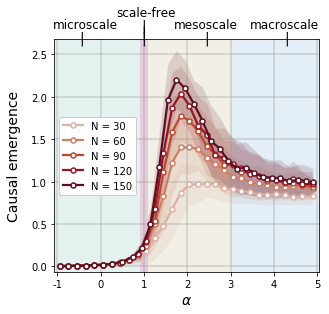

In [33]:
mult=0.95

fig,ax=plt.subplots(1,1,figsize=(5.0*mult,4.5*mult))

plt.subplots_adjust(wspace=0.24, hspace=0.11)
ymax_so_far = 0
xmin_so_far = 0
xmax_so_far = 0

for i,Nn in enumerate(Nvals):
    col = colorz[i]
    means = [np.mean(NCE[Nn][i]['CE']) for i in NCE[Nn].keys()]
    stdvs = [np.std(NCE[Nn][i]['CE'])  for i in NCE[Nn].keys()]
    alphs = list(NCE[Nn].keys())

    alphs = np.array([(alphs[i]+alphs[i+1])/2
                      for i in range(0,len(alphs)-1,2)])
    means = np.array([(means[i]+means[i+1])/2
                      for i in range(0,len(means)-1,2)])
    stdvs = np.array([(stdvs[i]+stdvs[i+1])/2
                      for i in range(0,len(stdvs)-1,2)])
    
    xmin_so_far = min([xmin_so_far, min(alphs)])
    xmax_so_far = max([xmax_so_far, max(alphs)])
    ymax_so_far = max([ymax_so_far, max(means+stdvs)])

    ax.plot(alphs, means,
            markeredgecolor=col, color=col,
            markerfacecolor='w',
            markeredgewidth=1.5,markersize=5.0,
           linestyle='-',marker='o',linewidth=2.2,label='N = %i'%Nn)
    
    ax.fill_between(alphs, means-stdvs, means+stdvs,
                    facecolor=col, alpha=0.2, 
                    edgecolors='w', linewidth=1)

cols = ["#a7d6ca","#dbb9d1","#d6cdae","#a5c9e3"]    
ax.fill_between([-2,0.90],[-1,-1],[3,3], 
                facecolor=cols[0],alpha=0.3,edgecolors='w',linewidth=0)
ax.fill_between([0.90,1.1],[-1,-1],[3,3],
                facecolor=cols[1],alpha=0.7,edgecolors='w',linewidth=0)
ax.fill_between([1.1,3.0],[-1,-1],[3,3],
                facecolor=cols[2],alpha=0.3,edgecolors='w',linewidth=0)
ax.fill_between([3.0,6],[-1,-1],[3,3],
                facecolor=cols[3],alpha=0.3,edgecolors='w',linewidth=0)
    
ax.text(-0.500, 2.65, '|', fontsize=14)
ax.text(0.9425, 2.65, '|', fontsize=14)
ax.text(0.9425, 2.72, '|', fontsize=14)
ax.text(0.9425, 2.79, '|', fontsize=14)
ax.text(2.4000, 2.65, '|', fontsize=14)
ax.text(4.2500, 2.65, '|', fontsize=14)
    
ax.text(-1.1, 2.81,'microscale',fontsize=12)
ax.text(0.35, 2.95,'scale-free',fontsize=12)
ax.text(1.70, 2.81,'mesoscale',fontsize=12)
ax.text(3.45, 2.81,'macroscale',fontsize=12)
    
ax.set_ylim(-0.025*ymax_so_far,ymax_so_far*1.05)
ax.set_xlim(-1.075,5*1.01)
ax.set_xlabel(r'$\alpha$',fontsize=14)
ax.set_ylabel('Causal emergence',fontsize=14, labelpad=10)
ax.legend(loc=6,framealpha=0.99)
ax.set_xticks(np.linspace(-1,5,7))
ax.set_xticklabels(["%i"%i for i in np.linspace(-1,5,7)])
ax.grid(linestyle='-', linewidth=2.0, color='#999999', alpha=0.3)

if save:
    plt.savefig(
        where_to_save_pngs+\
        'CE_pa_alpha_labs.png', 
        dpi=425, bbox_inches='tight')
    plt.savefig(
        where_to_save_pdfs+\
        'CE_pa_alpha_labs.pdf', 
        dpi=425, bbox_inches='tight')
    
plt.show()

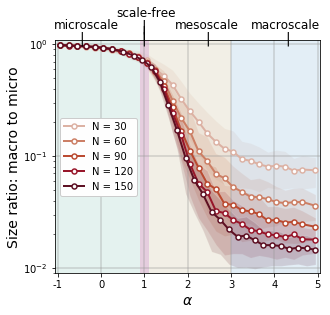

In [36]:
mult=0.95

fig,ax=plt.subplots(1,1,figsize=(5.0*mult,4.5*mult))

plt.subplots_adjust(wspace=0.24, hspace=0.11)
ymax_so_far = 0
xmin_so_far = 0
xmax_so_far = 0

for i,Nn in enumerate(Nvals):
    col = colorz[i]
    means = [np.mean(NCE[Nn][i]['N_frac']) for i in NCE[Nn].keys()]
    stdvs = [np.std(NCE[Nn][i]['N_frac'])  for i in NCE[Nn].keys()]
    alphs = list(NCE[Nn].keys())

    alphs = np.array([(alphs[i]+alphs[i+1])/2 
                      for i in range(0,len(alphs)-1,2)])
    means = np.array([(means[i]+means[i+1])/2 
                      for i in range(0,len(means)-1,2)])
    stdvs = np.array([(stdvs[i]+stdvs[i+1])/2 
                      for i in range(0,len(stdvs)-1,2)])

    xmin_so_far = min([xmin_so_far, min(alphs)])
    xmax_so_far = max([xmax_so_far, max(alphs)])
    ymax_so_far = max([ymax_so_far, max(means+stdvs)])
    
    ax.semilogy(alphs, means, markeredgecolor=col,
                color=col,markerfacecolor='w',
                markeredgewidth=1.5, markersize=5.0,
                linestyle='-',marker='o',linewidth=2.0,
                alpha=0.99,label='N = %i'%Nn)
    ax.fill_between(alphs, means-stdvs, means+stdvs, 
                    facecolor=col,alpha=0.2,
                    edgecolors='w',linewidth=1)
    
cols = ["#a7d6ca","#dbb9d1","#d6cdae","#a5c9e3"]    
ax.fill_between([-2,0.9],[-1,-1],[3,3],
                facecolor=cols[0],alpha=0.3,edgecolors='w',linewidth=0)
ax.fill_between([0.9,1.1],[-1,-1],[3,3],
                facecolor=cols[1],alpha=0.7,edgecolors='w',linewidth=0)
ax.fill_between([1.1,3.0],[-1,-1],[3,3],
                facecolor=cols[2],alpha=0.3,edgecolors='w',linewidth=0)
ax.fill_between([3.0,6],[-1,-1],[3,3],
                facecolor=cols[3],alpha=0.3,edgecolors='w',linewidth=0)
    
ax.text(-0.50, 1.036,'|', fontsize=14)
ax.text(0.935, 1.036,'|', fontsize=14)
ax.text(0.935, 1.170,'|', fontsize=14)
ax.text(0.935, 1.320,'|', fontsize=14)
ax.text(2.400, 1.036,'|', fontsize=14)
ax.text(4.250, 1.036,'|', fontsize=14)

ax.text(-1.1, 1.368, 'microscale', fontsize=12)
ax.text(0.35, 1.750, 'scale-free', fontsize=12)
ax.text(1.70, 1.368, 'mesoscale',  fontsize=12)
ax.text(3.45, 1.368, 'macroscale', fontsize=12)
    
ax.set_ylim(0.009*ymax_so_far,ymax_so_far*1.075)
ax.set_xlim(-1.075,5*1.01)
ax.set_xlabel(r'$\alpha$',fontsize=14)
ax.set_ylabel('Size ratio: macro to micro',
              fontsize=14, labelpad=2)
ax.legend(loc=6,framealpha=0.99)
ax.set_xticks(np.linspace(-1,5,7))
ax.set_xticklabels(["%i"%i for i in np.linspace(-1,5,7)])
ax.grid(linestyle='-', linewidth=2.0, color='#999999', alpha=0.3)

if save:
    plt.savefig(
        where_to_save_pngs+\
        'Nfrac_pa_alpha_labs.png',
        dpi=425, bbox_inches='tight')
    plt.savefig(
        where_to_save_pdfs+\
        'Nfrac_pa_alpha_labs.pdf',
        dpi=425, bbox_inches='tight')

plt.show()

_______________

## 6.2 Causal Emergence of Random Networks

In [267]:
Ns = [20,30,40,50]
ps = np.round(np.logspace(-3.25,-0.4,31),5)
Niter = 40

er_ce = {'p'  :[], 
         'N_micro':[],
         'N_macro':[],
         'EI_micro':[],
         'EI_macro':[],
         'CE_mean' :[],
         'CE_stdv' :[],
         'N_frac'  :[],
         'runtime' :[]}
ER_CE = {N:er_ce for N in Ns}

### Note: the following cell was run on a super-computing cluster. It is included as an example computation.

In [ ]:
for N in Ns:    
    print(N, dt.datetime.now())
    er_ce = {'p'  :[], 
             'N_micro':[],
             'N_macro':[],
             'EI_micro':[],
             'EI_macro':[],
             'CE_mean' :[],
             'CE_stdv' :[],
             'N_frac'  :[],
             'runtime' :[]}

    for p in ps:
        print('\t',p)
        cee = []
        for rr in range(Niter):
            G      = nx.erdos_renyi_graph(N,p)
            startT = dt.datetime.now()
            CE     = causal_emergence(G,printt=False)
            finisH = dt.datetime.now()

            diff   = finisH-startT
            diff   = diff.total_seconds()
            ce = CE['EI_macro']-CE['EI_micro']
            cee.append(ce)
            
        er_ce['p'].append(p)
        er_ce['N_micro'].append(N)
        er_ce['N_macro'].append(CE['G_macro'].number_of_nodes())
        er_ce['EI_micro'].append(CE['EI_micro'])
        er_ce['EI_macro'].append(CE['EI_macro'])
        er_ce['CE_mean'].append(np.mean(cee))
        er_ce['CE_stdv'].append(np.std( cee))
        er_ce['runtime'].append(diff)
        
    ER_CE[N] = er_ce.copy()

/Users/brennan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3099: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  self.set_xlim(upper, lower, auto=None)


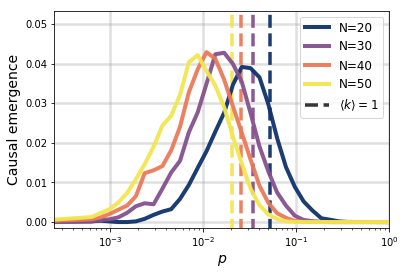

In [272]:
# import cmocean as cmo
# colors = cmo.cm.thermal(np.linspace(0.1,0.95,len(Ns)))
colors = plt.cm.viridis(np.linspace(0.0,1,len(Ns)))

i = 0
ymax = 0
plt.vlines(100, -1, 1, 
           label=r'$\langle k \rangle=1$', linestyle='--',
           color="#333333", linewidth=3.5, alpha=0.99)
for N in Ns:
    CE1 = np.array(ER_CE1[N]['CE_mean'].copy())
    CE2 = np.array(ER_CE2[N]['CE_mean'].copy())
    CE3 = np.array(ER_CE3[N]['CE_mean'].copy())
    CE4 = np.array(ER_CE4[N]['CE_mean'].copy())
    CE5 = np.array(ER_CE5[N]['CE_mean'].copy())
    CE6 = np.array(ER_CE6[N]['CE_mean'].copy())
    CEs = (CE1 + CE2 + CE3 + CE4 + CE5 + CE6)/6
    CEs = list(CEs)
    CEs = [(CEs[i] + CEs[i+1])/2 for i in range(0,len(CEs)-1)]
    CEs = [0] + CEs
    CEs.append(0)
    
    x1 = np.array(ER_CE1[N]['p'].copy())
    x2 = np.array(ER_CE2[N]['p'].copy())
    x3 = np.array(ER_CE3[N]['p'].copy())
    x4 = np.array(ER_CE4[N]['p'].copy())
    x5 = np.array(ER_CE5[N]['p'].copy())
    x6 = np.array(ER_CE6[N]['p'].copy())
    xx = (x1 + x2 + x3 + x4 + x5 + x6)/6
    xx = list(xx)
    xx = [(xx[i] + xx[i+1])/2 for i in range(0,len(xx)-1)]
    xx = [1e-4] + xx
    xx.append(1)
    
    std1 = np.array(ER_CE1[N]['CE_stdv'].copy())
    std2 = np.array(ER_CE2[N]['CE_stdv'].copy())
    std3 = np.array(ER_CE3[N]['CE_stdv'].copy())
    std4 = np.array(ER_CE4[N]['CE_stdv'].copy())
    std5 = np.array(ER_CE5[N]['CE_stdv'].copy())
    std6 = np.array(ER_CE6[N]['CE_stdv'].copy())
    stds = (std1 + std2 + std3 + std4 + std5 + std6)/6
    stds = list(stds)
    stds = [(stds[i] + stds[i+1])/2 for i in range(0,len(stds)-1)]
    stds = [0] + stds
    stds.append(0)

    ytop = np.array(CEs) + np.array(stds)
    ybot = np.array(CEs) - np.array(stds)
    ybot[ybot<0] = 0

    ymax = max([ymax, max(ytop)])
    
    plt.semilogx(xx, CEs, label='N=%i'%N, 
                 color=colors[i], linewidth=4.0, alpha=0.95)
    plt.vlines(1/(N-1), -1, 1, linestyle='--',
               color=colors[i], linewidth=3.5, alpha=0.95)
    i += 1

plt.xlim(2.5e-4,max(xx))
plt.ylim(-0.0015, ymax*0.6)
plt.grid(linestyle='-', linewidth=2.5, alpha=0.3, color='#999999')
plt.ylabel('Causal emergence', fontsize=14)
plt.xlabel(r'$p$', fontsize=14)
plt.legend(fontsize=12)

if save:
    plt.savefig(
        where_to_save_pngs+\
        'CE_ER_p_N.png', dpi=425, bbox_inches='tight')
    plt.savefig(
        where_to_save_pdfs+\
        'CE_ER_p_N.pdf', dpi=425, bbox_inches='tight')
plt.show()

/Users/brennan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3099: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  self.set_xlim(upper, lower, auto=None)


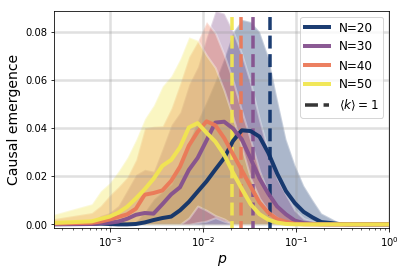

In [273]:
# import cmocean as cmo
# colors = cmo.cm.thermal(np.linspace(0.1,0.95,len(Ns)))
colors = plt.cm.viridis(np.linspace(0.0,1,len(Ns)))

i = 0
ymax = 0
plt.vlines(100, -1, 1, label=r'$\langle k \rangle=1$', linestyle='--',
           color="#333333", linewidth=3.5, alpha=0.99)
for N in Ns:
    CE1 = np.array(ER_CE1[N]['CE_mean'].copy())
    CE2 = np.array(ER_CE2[N]['CE_mean'].copy())
    CE3 = np.array(ER_CE3[N]['CE_mean'].copy())
    CE4 = np.array(ER_CE4[N]['CE_mean'].copy())
    CE5 = np.array(ER_CE5[N]['CE_mean'].copy())
    CE6 = np.array(ER_CE6[N]['CE_mean'].copy())
    CEs = (CE1 + CE2 + CE3 + CE4 + CE5 + CE6)/6
    CEs = list(CEs)
    CEs = [(CEs[i] + CEs[i+1])/2 for i in range(0,len(CEs)-1)]
    CEs = [0] + CEs
    CEs.append(0)
    
    x1 = np.array(ER_CE1[N]['p'].copy())
    x2 = np.array(ER_CE2[N]['p'].copy())
    x3 = np.array(ER_CE3[N]['p'].copy())
    x4 = np.array(ER_CE4[N]['p'].copy())
    x5 = np.array(ER_CE5[N]['p'].copy())
    x6 = np.array(ER_CE6[N]['p'].copy())
    xx = (x1 + x2 + x3 + x4 + x5 + x6)/6
    xx = list(xx)
    xx = [(xx[i] + xx[i+1])/2 for i in range(0,len(xx)-1)]
    xx = [1e-4] + xx
    xx.append(1)
    
    std1 = np.array(ER_CE1[N]['CE_stdv'].copy())
    std2 = np.array(ER_CE2[N]['CE_stdv'].copy())
    std3 = np.array(ER_CE3[N]['CE_stdv'].copy())
    std4 = np.array(ER_CE4[N]['CE_stdv'].copy())
    std5 = np.array(ER_CE5[N]['CE_stdv'].copy())
    std6 = np.array(ER_CE6[N]['CE_stdv'].copy())
    stds = (std1 + std2 + std3 + std4 + std5 + std6)/6
    stds = list(stds)
    stds = [(stds[i] + stds[i+1])/2 for i in range(0,len(stds)-1)]
    stds = [0] + stds
    stds.append(0)

    ytop = np.array(CEs) + np.array(stds)
    ybot = np.array(CEs) - np.array(stds)
    ybot[ybot<0] = 0

    ymax = max([ymax, max(ytop)])
    
    plt.semilogx(xx, CEs, label='N=%i'%N, color=colors[i], 
                 linewidth=4.0, alpha=0.95)
    plt.fill_between(xx, ytop, ybot, facecolor=colors[i], 
                     linewidth=2.0, alpha=0.35, edgecolor='w')
    plt.vlines(1/(N-1), -1, 1, linestyle='--',
               color=colors[i], linewidth=3.5, alpha=0.95)
    i += 1

plt.xlim(2.5e-4,max(xx))
plt.ylim(-0.0015, ymax)
plt.grid(linestyle='-', linewidth=2.5, 
         alpha=0.3, color='#999999')
plt.ylabel('Causal emergence', fontsize=14)
plt.xlabel(r'$p$', fontsize=14)
plt.legend(fontsize=12)

if save:
    plt.savefig(
        where_to_save_pngs+\
        'CE_ER_p_N0.png', dpi=425, bbox_inches='tight')
    plt.savefig(
        where_to_save_pdfs+\
        'CE_ER_p_N0.pdf', dpi=425, bbox_inches='tight')
plt.show()

In [409]:
for n in ER_CE1.keys():
    ER_CE1[n]['k'] = np.array(ER_CE1[n]['p'])*n
    
for n in ER_CE2.keys():
    ER_CE2[n]['k'] = np.array(ER_CE2[n]['p'])*n
    
for n in ER_CE3.keys():
    ER_CE3[n]['k'] = np.array(ER_CE3[n]['p'])*n
    
for n in ER_CE4.keys():
    ER_CE4[n]['k'] = np.array(ER_CE4[n]['p'])*n
    
for n in ER_CE5.keys():
    ER_CE5[n]['k'] = np.array(ER_CE5[n]['p'])*n
    
for n in ER_CE6.keys():
    ER_CE6[n]['k'] = np.array(ER_CE6[n]['p'])*n    

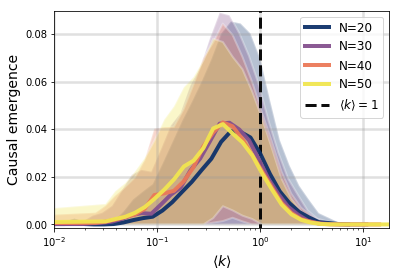

In [421]:
# import cmocean as cmo
# colors = cmo.cm.thermal(np.linspace(0.1,0.95,len(Ns)))
colors = plt.cm.viridis(np.linspace(0.0,1,len(Ns)))

i = 0
ymax = 0

for N in Ns:
    CE1 = np.array(ER_CE1[N]['CE_mean'].copy())
    CE2 = np.array(ER_CE2[N]['CE_mean'].copy())
    CE3 = np.array(ER_CE3[N]['CE_mean'].copy())
    CE4 = np.array(ER_CE4[N]['CE_mean'].copy())
    CE5 = np.array(ER_CE5[N]['CE_mean'].copy())
    CE6 = np.array(ER_CE6[N]['CE_mean'].copy())
    CEs = (CE1 + CE2 + CE3 + CE4 + CE5 + CE6)/6
    CEs = list(CEs)
    CEs = [(CEs[i] + CEs[i+1])/2 for i in range(0,len(CEs)-1)]
    CEs = [0] + CEs

    x1 = np.array(ER_CE1[N]['k'].copy())
    x2 = np.array(ER_CE2[N]['k'].copy())
    x3 = np.array(ER_CE3[N]['k'].copy())
    x4 = np.array(ER_CE4[N]['k'].copy())
    x5 = np.array(ER_CE5[N]['k'].copy())
    x6 = np.array(ER_CE6[N]['k'].copy())
    xx = (x1 + x2 + x3 + x4 + x5 + x6)/6
    xx = list(xx)
    xx = [(xx[i] + xx[i+1])/2 for i in range(0,len(xx)-1)]
    xx = [1e-4] + xx
    
    std1 = np.array(ER_CE1[N]['CE_stdv'].copy())
    std2 = np.array(ER_CE2[N]['CE_stdv'].copy())
    std3 = np.array(ER_CE3[N]['CE_stdv'].copy())
    std4 = np.array(ER_CE4[N]['CE_stdv'].copy())
    std5 = np.array(ER_CE5[N]['CE_stdv'].copy())
    std6 = np.array(ER_CE6[N]['CE_stdv'].copy())
    stds = (std1 + std2 + std3 + std4 + std5 + std6)/6
    stds = list(stds)
    stds = [(stds[i] + stds[i+1])/2 for i in range(0,len(stds)-1)]
    stds = [0] + stds

    ytop = np.array(CEs) + np.array(stds)
    ybot = np.array(CEs) - np.array(stds)
    ybot[ybot<0] = 0

    ymax = max([ymax, max(ytop)])
    
    plt.semilogx(xx, CEs, label='N=%i'%N, 
                 color=colors[i], linewidth=4.0, alpha=0.95)
    plt.fill_between(xx, ytop, ybot, 
                     facecolor=colors[i], 
                     linewidth=2.0, alpha=0.3, edgecolor='w')
    i += 1

plt.vlines(1, -1, 1, linestyle='--',label=r'$\langle k \rangle=1$',
           color='k', linewidth=3.0, alpha=0.95)

plt.xlim(1.0e-2,max(xx))
plt.ylim(-0.0015, ymax*1.01)
plt.grid(linestyle='-', linewidth=2.5, alpha=0.3, color='#999999')
plt.ylabel('Causal emergence', fontsize=14)
plt.xlabel(r'$\langle k \rangle$', fontsize=14)
plt.legend(fontsize=12)

if save:
    plt.savefig(
        where_to_save_pngs+\
        'CE_ER_k_N0.png', dpi=425, bbox_inches='tight')
    plt.savefig(
        where_to_save_pdfs+\
        'CE_ER_k_N0.pdf', dpi=425, bbox_inches='tight')
plt.show()

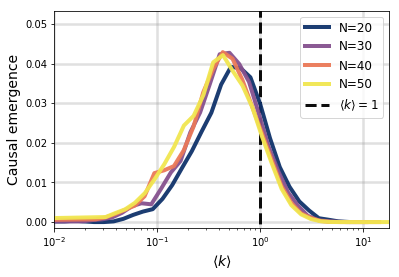

In [423]:
# import cmocean as cmo
# colors = cmo.cm.thermal(np.linspace(0.1,0.95,len(Ns)))
colors = plt.cm.viridis(np.linspace(0.0,1,len(Ns)))

i = 0
ymax = 0

for N in Ns:
    CE1 = np.array(ER_CE1[N]['CE_mean'].copy())
    CE2 = np.array(ER_CE2[N]['CE_mean'].copy())
    CE3 = np.array(ER_CE3[N]['CE_mean'].copy())
    CE4 = np.array(ER_CE4[N]['CE_mean'].copy())
    CE5 = np.array(ER_CE5[N]['CE_mean'].copy())
    CE6 = np.array(ER_CE6[N]['CE_mean'].copy())
    CEs = (CE1 + CE2 + CE3 + CE4 + CE5 + CE6)/6
    CEs = list(CEs)
    CEs = [(CEs[i] + CEs[i+1])/2 for i in range(0,len(CEs)-1)]
    CEs = [0] + CEs
    
    x1 = np.array(ER_CE1[N]['k'].copy())
    x2 = np.array(ER_CE2[N]['k'].copy())
    x3 = np.array(ER_CE3[N]['k'].copy())
    x4 = np.array(ER_CE4[N]['k'].copy())
    x5 = np.array(ER_CE5[N]['k'].copy())
    x6 = np.array(ER_CE6[N]['k'].copy())
    xx = (x1 + x2 + x3 + x4 + x5 + x6)/6
    xx = list(xx)
    xx = [(xx[i] + xx[i+1])/2 for i in range(0,len(xx)-1)]
    xx = [1e-4] + xx
    
    std1 = np.array(ER_CE1[N]['CE_stdv'].copy())
    std2 = np.array(ER_CE2[N]['CE_stdv'].copy())
    std3 = np.array(ER_CE3[N]['CE_stdv'].copy())
    std4 = np.array(ER_CE4[N]['CE_stdv'].copy())
    std5 = np.array(ER_CE5[N]['CE_stdv'].copy())
    std6 = np.array(ER_CE6[N]['CE_stdv'].copy())
    stds = (std1 + std2 + std3 + std4 + std5 + std6)/6
    stds = list(stds)
    stds = [(stds[i] + stds[i+1])/2 for i in range(0,len(stds)-1)]
    stds = [0] + stds

    ytop = np.array(CEs) + np.array(stds)
    ybot = np.array(CEs) - np.array(stds)
    ybot[ybot<0] = 0

    ymax = max([ymax, max(ytop)])
    
    plt.semilogx(xx, CEs, label='N=%i'%N, 
                 color=colors[i], 
                 linewidth=4.0, alpha=0.95)
    i += 1

plt.vlines(1, -1, 1, linestyle='--',
           label=r'$\langle k \rangle=1$',
           color='k', linewidth=3.0, alpha=0.95)

plt.xlim(1.0e-2,max(xx))
plt.ylim(-0.0015, ymax*0.6)
plt.grid(linestyle='-', linewidth=2.5, 
         alpha=0.3, color='#999999')
plt.ylabel('Causal emergence', fontsize=14)
plt.xlabel(r'$\langle k \rangle$', fontsize=14)
plt.legend(fontsize=12)

if save:
    plt.savefig(
        where_to_save_pngs+'CE_ER_k.png', 
        dpi=425, bbox_inches='tight')
    plt.savefig(
        where_to_save_pdfs+'CE_ER_k.pdf', 
        dpi=425, bbox_inches='tight')
plt.show()

## End of Chapter 06. In [Chapter 07](https://nbviewer.jupyter.org/github/jkbren/einet/blob/master/code/Chapter%2007%20-%20Estimating%20Causal%20Emergence%20in%20Real%20Networks.ipynb) we'll estimate causal emergence in real networks.

_______________